# Flag investigation

- Flags are probably digit coded
- Scale magnetometer on Swam C is broken so it alwas produse an error code
- Most effecient filtering is still the latitude
- Consider to filter values near around Flaged values.

In [1]:
%matplotlib notebook
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

In [2]:
FAC = pd.read_pickle('/home/simon/Desktop/Bachelor_project/data/pkl_files/FAC_dual.pkl')

In [3]:
FAC = FAC[abs(FAC.Latitude)>40]

In [4]:
FAC_p = FAC['20150310':'20150320']
N_total=len(FAC)
odd_val = len(FAC[abs(FAC.FAC)>20])

In [5]:
FAC.head()

Latitude   Longitude        Radius       IRC  \
2015-01-02 00:00:00.500 -74.064067 -135.102502  6.844350e+06 -0.849996   
2015-01-02 00:00:01.500 -74.126940 -135.067437  6.844351e+06 -0.694960   
2015-01-02 00:00:02.500 -74.189805 -135.032069  6.844352e+06 -0.531154   
2015-01-02 00:00:03.500 -74.252664 -134.996392  6.844353e+06 -0.372390   
2015-01-02 00:00:04.500 -74.315515 -134.960404  6.844354e+06 -0.250209   

                         IRC_Error       FAC  FAC_Error  Flags     Flags_F  \
2015-01-02 00:00:00.500   0.042043 -0.883094   0.043680    0.0  22222224.0   
2015-01-02 00:00:01.500   0.042202 -0.721999   0.043844    0.0  22222224.0   
2015-01-02 00:00:02.500   0.042362 -0.551803   0.044009    0.0  22222224.0   
2015-01-02 00:00:03.500   0.042523 -0.386855   0.044175    0.0  22222224.0   
2015-01-02 00:00:04.500   0.042686 -0.259921   0.044342    0.0  22222224.0   

                         Flags_B  Flags_q  Orbit_nr  Hemisphere  
2015-01-02 00:00:00.500      2.0    400.0       0.0        -1.0  
2015-01-02 00:00:01.500      2.0    400.0       0.0        -1.0  
2015-01-02 00:00:02.500      2.0    400.0       0.0        -1.0  
2015-01-02 00:00:03.500      2.0    400.0       0.0        -1.0  
2015-01-02 00:00:04.500      2.0    400.0       0.0        -1.0

## Flags

In [6]:
np.unique(FAC.Flags)

array([       0.,  1100000.,  2200000.,  3300000.,  4400000.])

In [7]:
flags = len(FAC[(FAC.Flags!=0)])
flag_odd = len(FAC[(FAC.Flags!=0)&(abs(FAC.FAC)>20)])

print("Flag observations is %d out off %d or %.2f procent" % (flags,N_total,flags/N_total*100))
print("Flaged odd values %d out off %d or %.2f procent" % (flag_odd,odd_val,flag_odd/odd_val*100))

Flag observations is 57089 out off 2793344 or 2.04 procent
Flaged odd values 0 out off 116 or 0.00 procent


## Flags_f

In [8]:
np.unique(FAC.Flags_F)

array([ 22222224.,  22222234.,  22222244.,  22222324.,  22222424.,
        22223224.,  22223234.,  22223244.,  22224224.,  22224244.,
        22232224.,  22232234.,  22232244.,  22232324.,  22232424.,
        22242224.,  22242324.,  22242424.,  22322224.,  22322244.,
        22322324.,  22322424.,  22323224.,  22323234.,  22324224.,
        22324234.,  22332224.,  22332324.,  22332424.,  22342224.,
        22342324.,  22342424.,  22422424.,  22432324.,  22432424.,
        22442324.,  22442424.,  33333334.,  33333434.,  33334344.,
        33343334.,  33343434.,  33433434.,  33443434.,  44444444.])

In [9]:
flags = len(FAC[(FAC.Flags_F!=22222224)])
flag_odd = len(FAC[(FAC.Flags_F!=22222224)&(abs(FAC.FAC)>20)])

print("Flag observations is %d out off %d or %.2f procent" % (flags,N_total,flags/N_total*100))
print("Flaged odd values %d out off %d or %.2f procent" % (flag_odd,odd_val,flag_odd/odd_val*100))

Flag observations is 48787 out off 2793344 or 1.75 procent
Flaged odd values 88 out off 116 or 75.86 procent


In [10]:
flags_codes = np.unique(FAC.Flags_F).astype('int32')
obs_remove = np.zeros(len(flags_codes))
odd_remove = np.zeros(len(flags_codes))
obs_remove[0] = len(FAC[(FAC.Flags_F>flags_codes[0])])
odd_remove[0] = len(FAC[(FAC.Flags_F>flags_codes[0])&(abs(FAC.FAC)>20)])

for i in range(1,len(flags_codes)):
    obs_remove[i] = len(FAC[(FAC.Flags_F>flags_codes[i])])
    odd_remove[i] = len(FAC[(FAC.Flags_F>flags_codes[i])&(abs(FAC.FAC)>20)])
    n = obs_remove[i-1]-obs_remove[i]
    n_odd = odd_remove[i-1]-odd_remove[i]
    print("%d values are flaged with %d and %.2f procent of those are outliers" % (n,flags_codes[i],n_odd/n*100))

727 values are flaged with 22222234 and 0.00 procent of those are outliers
43501 values are flaged with 22222244 and 0.00 procent of those are outliers
620 values are flaged with 22222324 and 0.00 procent of those are outliers
57 values are flaged with 22222424 and 0.00 procent of those are outliers
33 values are flaged with 22223224 and 6.06 procent of those are outliers
3 values are flaged with 22223234 and 33.33 procent of those are outliers
5 values are flaged with 22223244 and 60.00 procent of those are outliers
6 values are flaged with 22224224 and 0.00 procent of those are outliers
3 values are flaged with 22224244 and 100.00 procent of those are outliers
2640 values are flaged with 22232224 and 1.25 procent of those are outliers
3 values are flaged with 22232234 and 0.00 procent of those are outliers
12 values are flaged with 22232244 and 0.00 procent of those are outliers
134 values are flaged with 22232324 and 0.00 procent of those are outliers
14 values are flaged with 22232

The fourth digit have a great influence on outliers it is the "At least one of 4 nearest ASM samples is su
spicious" flag

In [11]:
np.unique(FAC.Flags_F).astype('int_')

array([22222224, 22222234, 22222244, 22222324, 22222424, 22223224,
       22223234, 22223244, 22224224, 22224244, 22232224, 22232234,
       22232244, 22232324, 22232424, 22242224, 22242324, 22242424,
       22322224, 22322244, 22322324, 22322424, 22323224, 22323234,
       22324224, 22324234, 22332224, 22332324, 22332424, 22342224,
       22342324, 22342424, 22422424, 22432324, 22432424, 22442324,
       22442424, 33333334, 33333434, 33334344, 33343334, 33343434,
       33433434, 33443434, 44444444])

In [12]:
((np.unique(FAC.Flags_F)%10**4)/1000).astype('int_')

array([2, 2, 2, 2, 2, 3, 3, 3, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,
       3, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 4, 3, 3, 3, 3, 4])

In [13]:
flags = len(FAC[(((FAC.Flags_F%10**4)/1000).astype('int_')>2)])
flag_odd = len(FAC[(((FAC.Flags_F%10**4)/1000).astype('int_')>2)&(abs(FAC.FAC)>20)])

print("Flag observations is %d out off %d or %.2f procent" % (flags,N_total,flags/N_total*100))
print("Flaged odd values %d out off %d or %.2f procent" % (flag_odd,odd_val,flag_odd/odd_val*100))

Flag observations is 119 out off 2793344 or 0.00 procent
Flaged odd values 41 out off 116 or 35.34 procent


# Flags_B

In [14]:
np.unique(FAC.Flags_B).astype('int32')

array([       2,       12,       22,       32,       42,      102,
           1002,     2002,    10002, 11110113, 11111113, 11111123,
       11112113, 22222224], dtype=int32)

In [15]:
flags = len(FAC[(FAC.Flags_B!=2)])
flag_odd = len(FAC[(FAC.Flags_B!=2)&(abs(FAC.FAC)>20)])

print("Flag observations is %d out off %d or %.2f procent" % (flags,N_total,flags/N_total*100))
print("Flaged odd values %d out off %d or %.2f procent" % (flag_odd,odd_val,flag_odd/odd_val*100))

Flag observations is 3241 out off 2793344 or 0.12 procent
Flaged odd values 69 out off 116 or 59.48 procent


In [16]:
flags_codes = np.unique(FAC.Flags_B).astype('int32')
obs_remove = np.zeros(len(flags_codes))
odd_remove = np.zeros(len(flags_codes))

obs_remove[0] = len(FAC[(FAC.Flags_B>flags_codes[0])])
odd_remove[0] = len(FAC[(FAC.Flags_B>flags_codes[0])&(abs(FAC.FAC)>20)])

for i in range(1,len(flags_codes)):
    obs_remove[i] = len(FAC[(FAC.Flags_B>flags_codes[i])])
    odd_remove[i] = len(FAC[(FAC.Flags_B>flags_codes[i])&(abs(FAC.FAC)>20)])
    n = obs_remove[i-1]-obs_remove[i]
    n_odd = odd_remove[i-1]-odd_remove[i]
    print("%d values are flaged with %d and %.2f procent of those are outliers" % (n,flags_codes[i],n_odd/n*100))

150 values are flaged with 12 and 2.67 procent of those are outliers
1293 values are flaged with 22 and 0.00 procent of those are outliers
5 values are flaged with 32 and 0.00 procent of those are outliers
32 values are flaged with 42 and 0.00 procent of those are outliers
2 values are flaged with 102 and 0.00 procent of those are outliers
1156 values are flaged with 1002 and 2.77 procent of those are outliers
555 values are flaged with 2002 and 0.54 procent of those are outliers
4 values are flaged with 10002 and 0.00 procent of those are outliers
4 values are flaged with 11110113 and 100.00 procent of those are outliers
27 values are flaged with 11111113 and 48.15 procent of those are outliers
1 values are flaged with 11111123 and 100.00 procent of those are outliers
2 values are flaged with 11112113 and 100.00 procent of those are outliers
10 values are flaged with 22222224 and 100.00 procent of those are outliers


The first five digit does not cours a lot of difference. The rest is "Discrepancy between ASM and VFM measurements"

In [17]:
flags = len(FAC[(FAC.Flags_B>10002)])
flag_odd = len(FAC[(FAC.Flags_B>10002)&(abs(FAC.FAC)>20)])

print("Flag observations is %d out off %d or %.2f procent" % (flags,N_total,flags/N_total*100))
print("Flaged odd values %d out off %d or %.2f procent" % (flag_odd,odd_val,flag_odd/odd_val*100))

Flag observations is 44 out off 2793344 or 0.00 procent
Flaged odd values 30 out off 116 or 25.86 procent


Conclusion is that flags_B over 10002 should not be included

## Flags_q

In [18]:
np.unique(FAC.Flags_q)

array([  0.00000000e+00,   1.00000000e+00,   2.00000000e+00,
         3.00000000e+00,   4.00000000e+00,   1.00000000e+01,
         1.10000000e+01,   2.00000000e+01,   2.20000000e+01,
         1.00000000e+02,   1.01000000e+02,   1.02000000e+02,
         1.03000000e+02,   1.10000000e+02,   1.11000000e+02,
         1.21000000e+02,   2.00000000e+02,   2.01000000e+02,
         2.02000000e+02,   2.20000000e+02,   3.00000000e+02,
         3.01000000e+02,   4.00000000e+02,   4.04000000e+02,
         4.40000000e+02,   1.00000000e+04,   1.00010000e+04,
         1.00020000e+04,   1.00030000e+04,   1.00040000e+04,
         1.00100000e+04,   1.00110000e+04,   1.00120000e+04,
         1.00210000e+04,   1.01000000e+04,   1.01010000e+04,
         1.01020000e+04,   1.01030000e+04,   1.01100000e+04,
         1.01110000e+04,   1.01120000e+04,   1.01200000e+04,
         1.02000000e+04,   1.02010000e+04,   1.02100000e+04,
         1.02300000e+04,   1.03000000e+04,   1.03040000e+04,
         1.03400000e+04,

In [19]:
flags = len(FAC[(FAC.Flags_q>0)])
flag_odd = len(FAC[(FAC.Flags_q>0)&(abs(FAC.FAC)>20)])

print("Flag observations is %d out off %d or %.2f procent" % (flags,N_total,flags/N_total*100))
print("Flaged odd values %d out off %d or %.2f procent" % (flag_odd,odd_val,flag_odd/odd_val*100))

Flag observations is 1204252 out off 2793344 or 43.11 procent
Flaged odd values 107 out off 116 or 92.24 procent


In [20]:
flags_codes = np.unique(FAC.Flags_q).astype('int32')
obs_remove = np.zeros(len(flags_codes))
odd_remove = np.zeros(len(flags_codes))
obs_remove[0] = len(FAC[(FAC.Flags_q>flags_codes[0])])
odd_remove[0] = len(FAC[(FAC.Flags_q>flags_codes[0])&(abs(FAC.FAC)>20)])

for i in range(1,len(flags_codes)):
    obs_remove[i] = len(FAC[(FAC.Flags_q>flags_codes[i])])
    odd_remove[i] = len(FAC[(FAC.Flags_q>flags_codes[i])&(abs(FAC.FAC)>20)])
    n = obs_remove[i-1]-obs_remove[i]
    n_odd = odd_remove[i-1]-odd_remove[i]
    print("%d values are flaged with %d and %.2f procent of those are outliers" % (n,flags_codes[i],n_odd/n*100))

2577 values are flaged with 1 and 0.00 procent of those are outliers
1330 values are flaged with 2 and 0.00 procent of those are outliers
41 values are flaged with 3 and 0.00 procent of those are outliers
11 values are flaged with 4 and 0.00 procent of those are outliers
469 values are flaged with 10 and 0.00 procent of those are outliers
120 values are flaged with 11 and 0.00 procent of those are outliers
23 values are flaged with 20 and 0.00 procent of those are outliers
4 values are flaged with 22 and 0.00 procent of those are outliers
605 values are flaged with 100 and 0.00 procent of those are outliers
1230 values are flaged with 101 and 0.00 procent of those are outliers
35 values are flaged with 102 and 0.00 procent of those are outliers
7 values are flaged with 103 and 0.00 procent of those are outliers
6 values are flaged with 110 and 0.00 procent of those are outliers
8 values are flaged with 111 and 0.00 procent of those are outliers
1 values are flaged with 121 and 0.00 pro

1 values are flaged with 100102 and 0.00 procent of those are outliers
3 values are flaged with 100110 and 0.00 procent of those are outliers
3 values are flaged with 100111 and 0.00 procent of those are outliers
2 values are flaged with 100211 and 0.00 procent of those are outliers
1556 values are flaged with 100301 and 0.00 procent of those are outliers
501 values are flaged with 100303 and 0.00 procent of those are outliers
883 values are flaged with 100310 and 0.00 procent of those are outliers
434 values are flaged with 100313 and 0.23 procent of those are outliers
1 values are flaged with 100314 and 0.00 procent of those are outliers
66 values are flaged with 100330 and 0.00 procent of those are outliers
118 values are flaged with 100331 and 0.00 procent of those are outliers
24 values are flaged with 110001 and 0.00 procent of those are outliers
63 values are flaged with 110010 and 7.94 procent of those are outliers
150 values are flaged with 110011 and 0.67 procent of those are

75 values are flaged with 210321 and 0.00 procent of those are outliers
10 values are flaged with 210322 and 0.00 procent of those are outliers
34 values are flaged with 220002 and 0.00 procent of those are outliers
5 values are flaged with 220004 and 0.00 procent of those are outliers
14 values are flaged with 220011 and 0.00 procent of those are outliers
3 values are flaged with 220012 and 0.00 procent of those are outliers
29 values are flaged with 220020 and 0.00 procent of those are outliers
3 values are flaged with 220021 and 0.00 procent of those are outliers
271 values are flaged with 220022 and 0.00 procent of those are outliers
13 values are flaged with 220111 and 0.00 procent of those are outliers
11 values are flaged with 220112 and 0.00 procent of those are outliers
5 values are flaged with 220201 and 0.00 procent of those are outliers
33 values are flaged with 220202 and 12.12 procent of those are outliers
7 values are flaged with 220211 and 0.00 procent of those are outl

The first six digit does not cours a lot of difference. The rest is "On-ground aberrational correction of any attitude sample among 4 nearest STR samples."

In [21]:
flags = len(FAC[(FAC.Flags_q>440404)])
flag_odd = len(FAC[(FAC.Flags_q>440404)&(abs(FAC.FAC)>20)])

print("Flag observations is %d out off %d or %.2f procent" % (flags,N_total,flags/N_total*100))
print("Flaged odd values %d out off %d or %.2f procent" % (flag_odd,odd_val,flag_odd/odd_val*100))

Flag observations is 59 out off 2793344 or 0.00 procent
Flaged odd values 59 out off 116 or 50.86 procent


## Combined

In [22]:

flags = len(FAC[(FAC.Flags_B>10002)|(FAC.Flags_q>440404)])
flag_odd = len(FAC[((FAC.Flags_B>10002)|(FAC.Flags_q>440404))&(abs(FAC.FAC)>20)])

print("Flag observations is %d out off %d or %.2f procent" % (flags,N_total,flags/N_total*100))
print("Flaged odd values %d out off %d or %.2f procent" % (flag_odd,odd_val,flag_odd/odd_val*100))

Flag observations is 85 out off 2793344 or 0.00 procent
Flaged odd values 71 out off 116 or 61.21 procent


In [23]:

flags = len(FAC[(FAC.Flags_B>10002)|(FAC.Flags_q>440404)|(((FAC.Flags_F%10**4)/1000).astype('int_')>2)])
flag_odd = len(FAC[((FAC.Flags_B>10002)|(FAC.Flags_q>440404)|(((FAC.Flags_F%10**4)/1000).astype('int_')>2))&(abs(FAC.FAC)>20)])

print("Flag observations is %d out off %d or %.2f procent" % (flags,N_total,flags/N_total*100))
print("Flaged odd values %d out off %d or %.2f procent" % (flag_odd,odd_val,flag_odd/odd_val*100))

Flag observations is 168 out off 2793344 or 0.01 procent
Flaged odd values 85 out off 116 or 73.28 procent


In [28]:
flags = len(FAC[(FAC.Flags_B>2)|(FAC.Flags_q>440404)|(FAC.Flags_F>22222234)])
flag_odd = len(FAC[((FAC.Flags_B>2)|(FAC.Flags_q>440404)|(FAC.Flags_F>22222234))&(abs(FAC.FAC)>20)])

print("Flag observations is %d out off %d or %.2f procent" % (flags,N_total,flags/N_total*100))
print("Flaged odd values %d out off %d or %.2f procent" % (flag_odd,odd_val,flag_odd/odd_val*100))

Flag observations is 49449 out off 2793344 or 1.77 procent
Flaged odd values 94 out off 116 or 81.03 procent


<IPython.core.display.Javascript object>


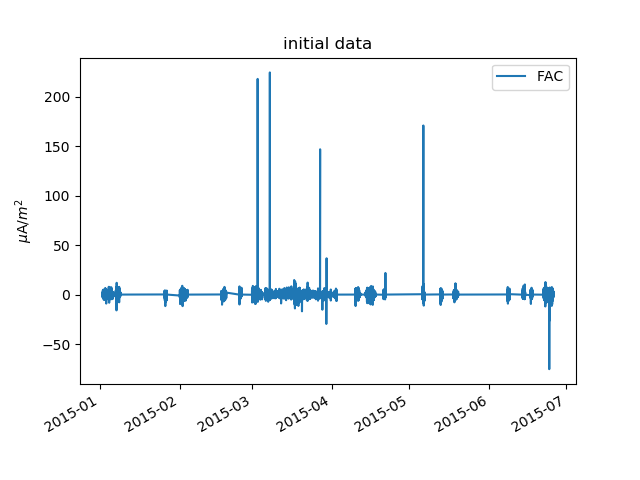

Text(0.5,1,'initial data')

In [34]:
plt.figure()

p1 = FAC.FAC.plot(legend=True)
p1.set_ylabel('$\mu$A/$m^2$')
plt.title('initial data')

<IPython.core.display.Javascript object>


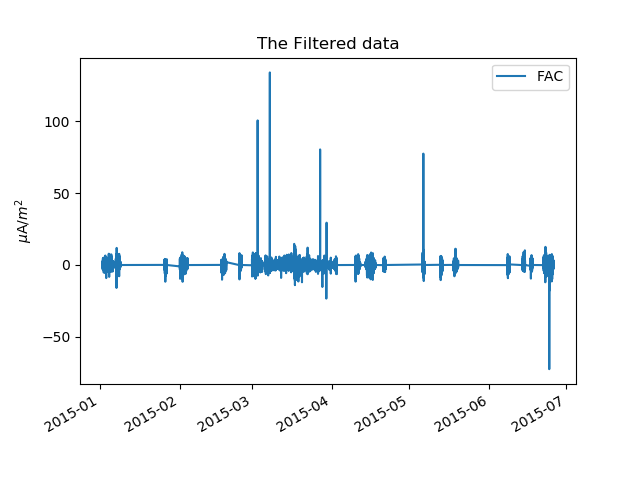

Text(0.5,1,'The Filtered data')

In [35]:
plt.figure()

p1 = FAC[(FAC.Flags_B<=10002)&(FAC.Flags_q<=440404)&(((FAC.Flags_F%10**4)/1000).astype('int_')<=2)].FAC.plot(legend=True)
p1.set_ylabel('$\mu$A/$m^2$')
plt.title('The Filtered data')

In [29]:
len(FAC[(FAC.Flags_B<=10002)&(FAC.Flags_q<=440404)|(((FAC.Flags_F%10**4)/1000).astype('int_')<=2)])

2793326

In [32]:
len(FAC)-len(FAC[(FAC.Flags_B<=10002)&(FAC.Flags_q<=440404)&(((FAC.Flags_F%10**4)/1000).astype('int_')<=2)])

168